### Geographical distribution of lung cancer incidence in the US


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
harvard_df = pd.read_csv('cleaned_air_cancer_df.csv')

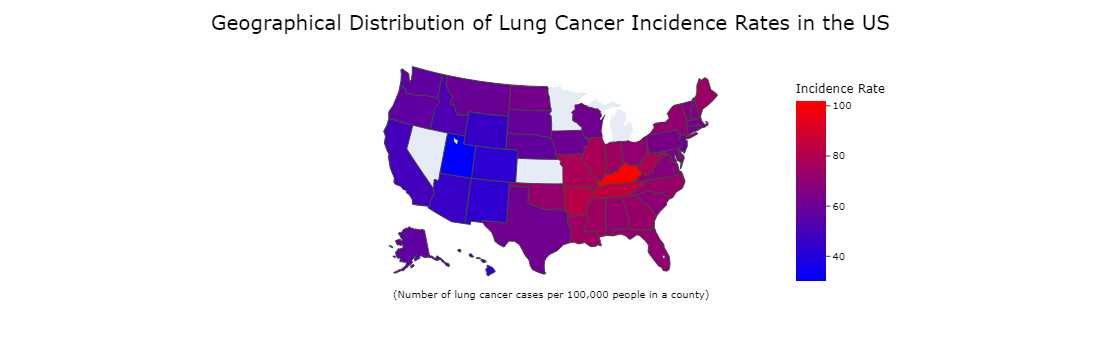

In [3]:
state_incidence_rates = harvard_df.groupby('State')['Lung Cancer'].mean().reset_index()

fig = px.choropleth(
    state_incidence_rates,
    locations='State', 
    locationmode="USA-states",
    color='Lung Cancer',
    color_continuous_scale='bluered',
    scope="usa",
    hover_name='State',
    hover_data={'Lung Cancer': ':.2f'},
    labels={'Lung Cancer': 'Lung Cancer Incidence Rate'}
)

fig.update_layout(
    title_text='Geographical Distribution of Lung Cancer Incidence Rates in the US',
    title_x = 0.5,
    geo=dict(
        lakecolor='rgb(255, 255, 255)' 
    ),
    coloraxis_colorbar=dict(
        title='Incidence Rate', 
        x=0.75, 
        y=0.45,
        tickfont=dict(size=10),
        titlefont=dict(size=12),
        ticks='outside', 
        ticklen=5
    ),
    font = dict(
        # family="Times New Roman",
        size=14,
        color="black"  
    ),
    # height = 500,
    # width = 500
)

fig.add_annotation(
    text='(Number of lung cancer cases per 100,000 people in a county)',
    xref='paper', yref='paper',
    x=0.5, y=-0.1,
    showarrow=False,
    font=dict(size=10)
)



fig.show()


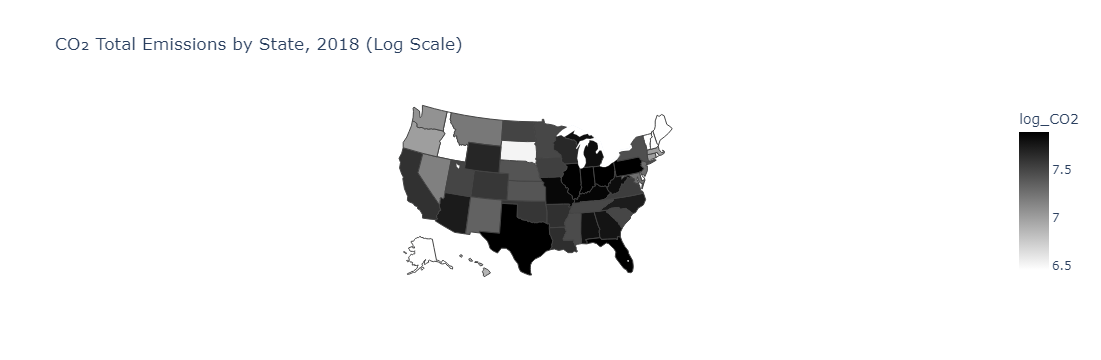

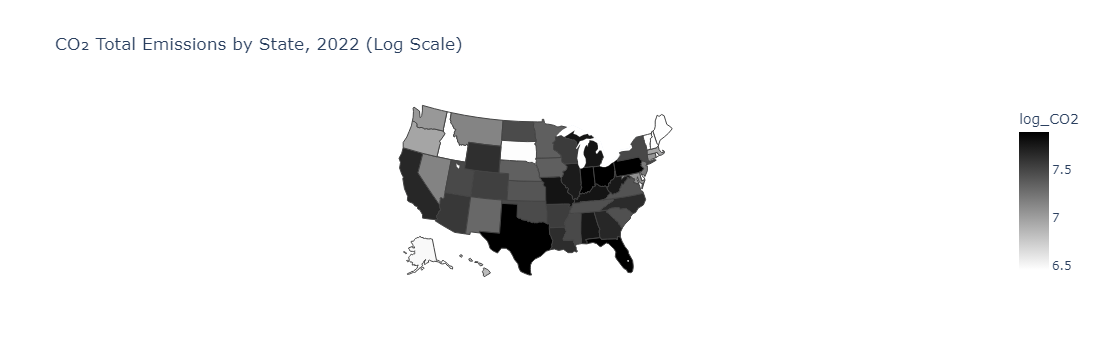

In [4]:
emissions_2018 = pd.read_csv('emis2018.csv')
emissions_2022 = pd.read_csv('emis2022.csv')

state_abbreviations = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID',
    'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS',
    'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT',
    'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI', 'WYOMING': 'WY'
}



emissions_2018 = emissions_2018[emissions_2018['STATE'].isin(state_abbreviations.keys())]
emissions_2018['STATE'] = emissions_2018['STATE'].map(state_abbreviations)

emissions_2022 = emissions_2022[emissions_2022['STATE'].isin(state_abbreviations.keys())]
emissions_2022['STATE'] = emissions_2022['STATE'].map(state_abbreviations)

emissions_2018['log_CO2'] = np.log10(emissions_2018['CO22018'] + 1)
emissions_2022['log_CO2'] = np.log10(emissions_2022['CO22022'] + 1)

quant_10 = emissions_2018['log_CO2'].quantile(0.10)
quant_90 = emissions_2018['log_CO2'].quantile(0.90)

white_to_red = ['white', 'black']

fig_2018 = px.choropleth(
    emissions_2018,
    locations='STATE',
    locationmode='USA-states',
    color='log_CO2',
    color_continuous_scale=white_to_red,
    range_color=[quant_10, quant_90],
    scope='usa',
    title='CO₂ Total Emissions by State, 2018 (Log Scale)'
)

fig_2022 = px.choropleth(
    emissions_2022,
    locations='STATE',
    locationmode='USA-states',
    color='log_CO2',
    color_continuous_scale=white_to_red,
    range_color=[quant_10, quant_90],
    scope='usa',
    title='CO₂ Total Emissions by State, 2022 (Log Scale)'
)

fig_2018.show()
fig_2022.show()

In [5]:
pd.set_option('display.max_columns', None)
correlation_matrix = harvard_df.corr(numeric_only=True)

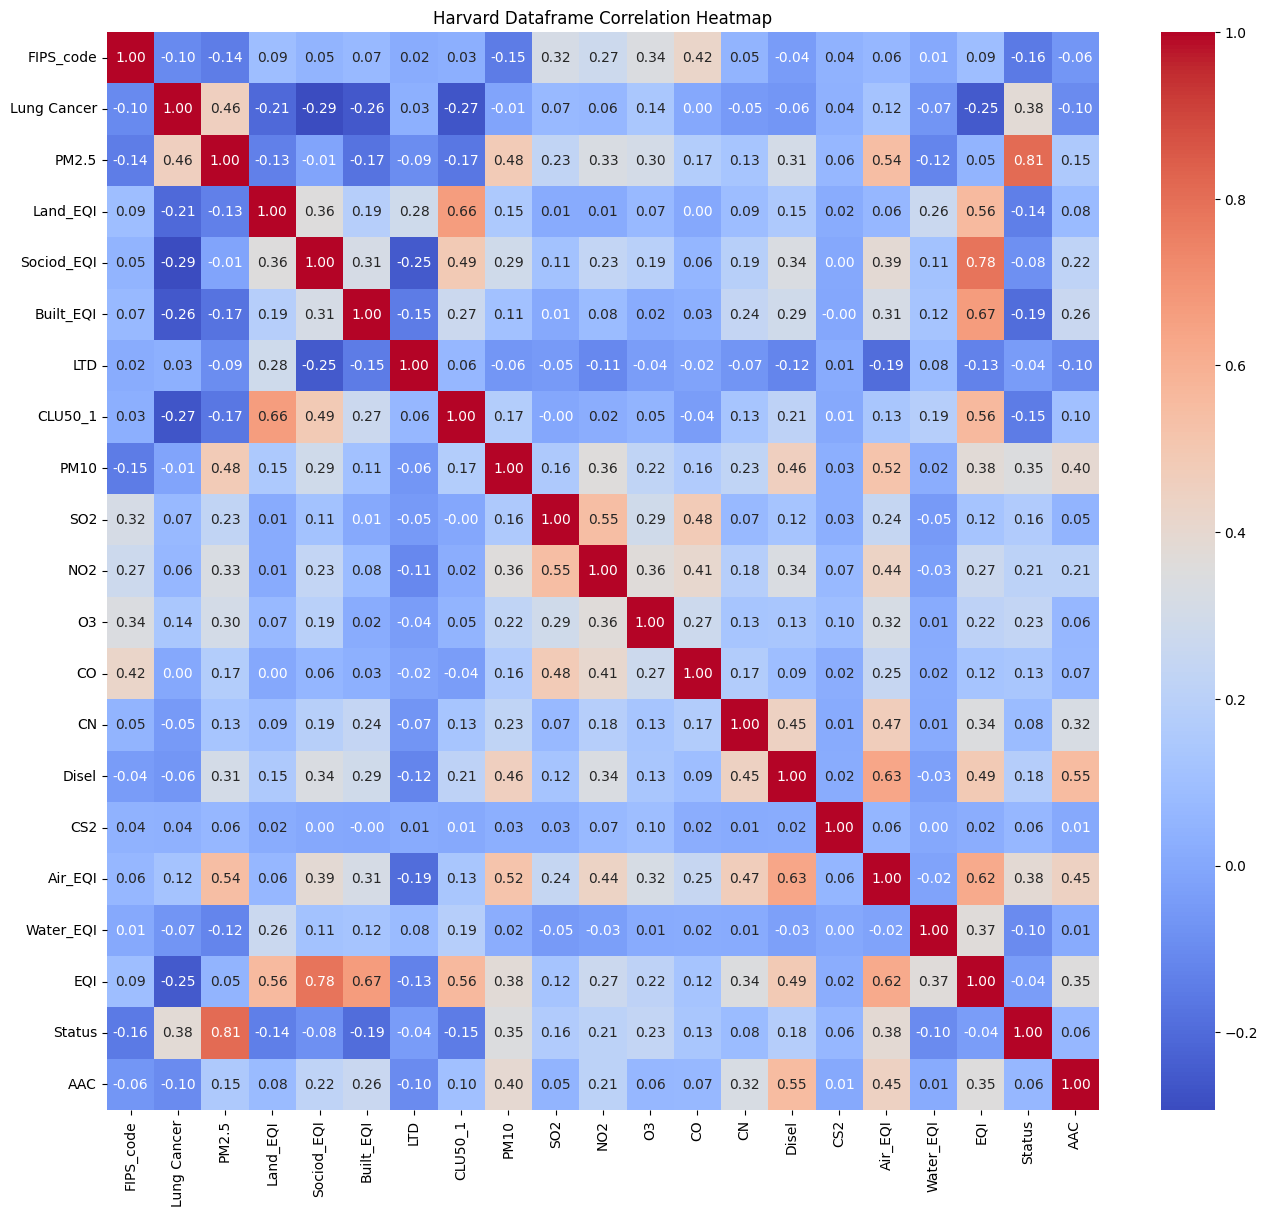

In [6]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Harvard Dataframe Correlation Heatmap')
plt.show()

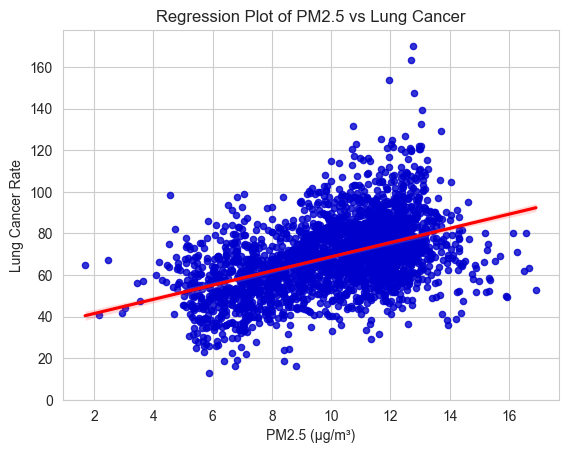

In [7]:
sns.set_style("whitegrid")

sns.regplot(x='PM2.5', y='Lung Cancer', data=harvard_df, color='mediumblue', line_kws={'color': 'red'}, scatter_kws={'s': 20})

plt.ylim(0,)

plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Lung Cancer Rate')
plt.title('Regression Plot of PM2.5 vs Lung Cancer')

plt.show()

In [8]:
brush = alt.selection_interval(resolve='global')

base = alt.Chart(harvard_df).mark_point().encode(
    y='Lung Cancer:Q',
    # color=alt.condition(brush, 'Region', alt.ColorValue('gray')),
    color=alt.condition(brush,
                    alt.Color('Region:N', scale=alt.Scale(scheme='set1')),
                    alt.ColorValue('gray')),
    # tooltip = 'State:N'
    tooltip = ['State:N', 'Lung Cancer:Q', alt.Tooltip('Land_EQI:Q', format='.2f'), alt.Tooltip('Built_EQI:Q', format='.2f'), alt.Tooltip('Sociod_EQI:Q', format='.2f')]
).add_params(
    brush
).properties(
    width=250,
    height=250,
)

final_land = base.encode(x='Land_EQI').properties(title="Land_EQI vs Lung Cancer Incidence Rates") + base.encode(x='Land_EQI').transform_regression('Land_EQI','Lung Cancer').mark_line(color='blue')
final_built = base.encode(x='Built_EQI').properties(title="Built_EQI vs Lung Cancer Incidence Rates") + base.encode(x='Built_EQI').transform_regression('Built_EQI','Lung Cancer').mark_line(color='blue') 
final_sociod = base.encode(x='Sociod_EQI').properties(title="Sociod_EQI vs Lung Cancer Incidence Rates") + base.encode(x='Sociod_EQI').transform_regression('Sociod_EQI','Lung Cancer').mark_line(color='blue') 

chart = alt.concat(
    final_land,
    final_built,
    final_sociod,
    # base.encode(x='Land_EQI'),
    # base.encode(x='Built_EQI'),
    # base.encode(x='Sociod_EQI'),
    title=alt.TitleParams(text="Comparing EQIs to Lung Cancer Incidence Rates", fontSize = 20)
)

chart

alt.ConcatChart(...)

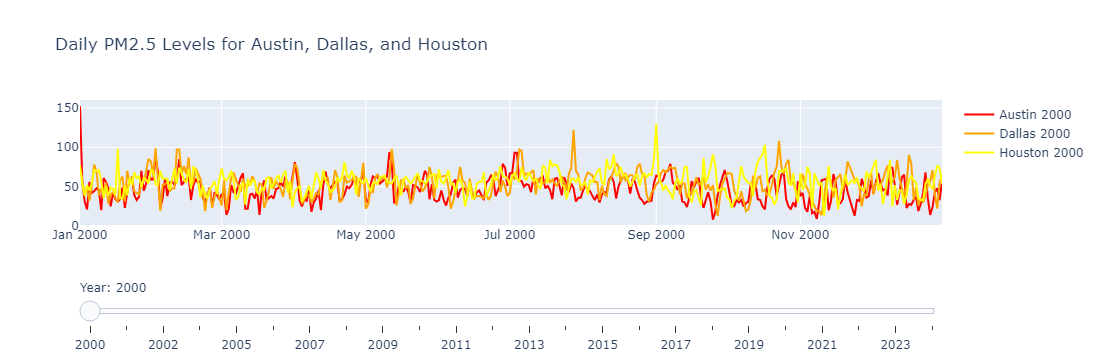

In [10]:
df = pd.read_csv('airmultiple.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

fig = make_subplots()

cities = ['Austin', 'Dallas', 'Houston']
colors = {'Austin': 'red', 'Dallas': 'orange', 'Houston': 'yellow'}

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    for city in cities:
        fig.add_trace(
            go.Scatter(
                x=year_data['Date'],
                y=year_data[city],
                name=f'{city} {year}',
                line=dict(color=colors[city]),
                visible=False
            )
        )

steps = []
for i, year in enumerate(sorted(df['Year'].unique())):
    step = dict(
        method='update',
        args=[{'visible': [False] * len(fig.data)},
              {'title': f'Daily PM2.5 Levels for Austin, Dallas, and Houston: {year}'}],
        label=str(year)
    )
    for j in range(len(fig.data)):
        if fig.data[j].name.endswith(str(year)):
            step['args'][0]['visible'][j] = True
    
    steps.append(step)

for j in range(len(fig.data)):
    if fig.data[j].name.endswith(str(sorted(df['Year'].unique())[0])):
        fig.data[j].visible = True

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title='Daily PM2.5 Levels for Austin, Dallas, and Houston'
)

fig.show()
